#### Here are some objectives:

1. Understand the meaning and limitations of R²
2. Learn about evaluation metrics for linear regression and when to use them
3. Implement a simple and multiple linear regression model with the 80 Cereals dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set(style='ticks',color_codes=True)

cereal = pd.read_csv("cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


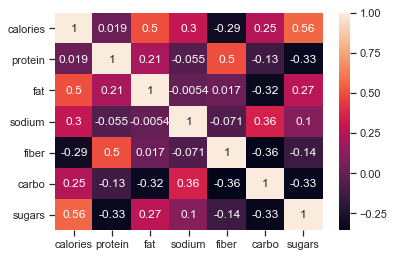

In [8]:
f = (cereal.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars']].dropna()).corr()
sns.heatmap(f,annot=True)

#### Plot displaying every Correlation is too large , taking smaller plots

Text(0.5, 1.03, 'Rating vs. sugars, calories and fiber')

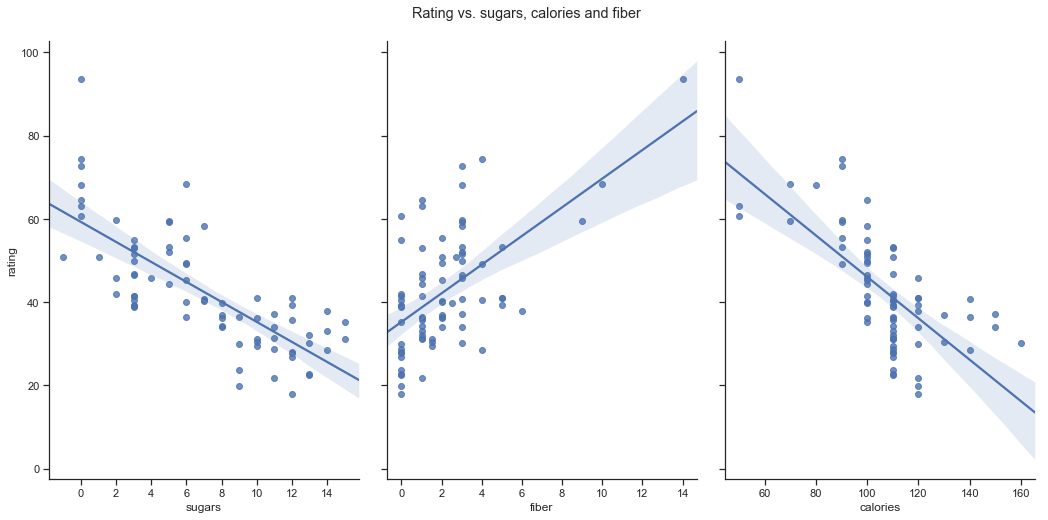

In [19]:
ax = sns.pairplot(cereal,x_vars=['sugars','fiber','calories'],y_vars='rating',height=7,aspect=0.7,kind='reg')
ax.fig.suptitle("Rating vs. sugars, calories and fiber",y=1.03)

To verify the relationship, we can plot the residuals of the our model on a graph and look for patterns.

C:\Users\yjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\yjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


Text(0.5, 1.0, 'Rating vs Calories residual Plot')

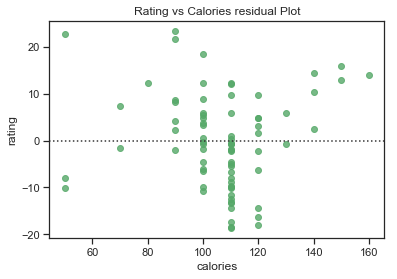

In [61]:
ax_residual = sns.residplot(cereal['calories'],cereal['rating'],lowess=True,color='g')
ax_residual.set_title("Rating vs Calories residual Plot")

There isn’t a clear pattern in the residuals, so there is no evidence that there is a better-fitting, non-linear equation.

In [62]:
import scipy
scipy.stats.linregress(cereal['calories'],cereal['rating'])

LinregressResult(slope=-0.49701318979564285, intercept=95.78802384439143, rvalue=-0.6893760311652586, pvalue=4.1402774000064275e-12, stderr=0.06030617024600228)

##### Here slope is = -0.497 and r (Correlation Coefficient) = -0.689 

By squaring R, we get the coefficient of determination, R². R² is a value that represents what percentage of the variation in the y variable can be explained by the variation in the x variable. A high R² value indicates a stronger model. Let’s look at some R² values in our dataset:

In [66]:
def rsquared(x,y):
    slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
    return r_value**2

print("R^2 value of model with cup predictor",rsquared(cereal['cups'],cereal['rating'])) #Bad Predictor
print("R^2 value of model with calories predictor",rsquared(cereal['calories'],cereal['rating'])) #Good Predictor

R^2 value of model with cup predictor 0.0412740112014871
R^2 value of model with calories predictor 0.4752393123451636


#### Simple linear regression is useful, but sometimes we want to see how several variables can be used to predict a single variable
Calories, fiber and sugar seemed to be good predictors, when we reviewed correlations pairs plot. Lets make a model using those three

#### Adjusted $R^2$ Formula :
$ \bar{R^2} =  1-(1-R^2)[\frac{n-1}{n-(k+1)}] $
, where n = sample size and k = number of indepenedent variables in regression equation

In [60]:
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = cereal.iloc[:,[3,7,9,14,15]]
m3 = LinearRegression().fit(data.iloc[:,0:3],data.rating)
mp= m3.predict(data.iloc[:,0:3])
r2_prime = r2_score(data.rating,mp)
r2_adj = 1- (1-r2_prime)*((15-1)/(15-3-1))
print("R^2: ",r2_prime)
print("R^2 Adj: ",r2_adj) 

R^2:  0.8483669504178866
R^2 Adj:  0.8070124823500374


In [52]:
LinearRegression().fit(cereal.iloc[:,[3,7,9]],cereal.rating) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We find that the R² value has increased to from .475 in the one-variable model (with calories as the predictor), to .848. This seems to indicate that the predictive power of our model has increased.

However, lets add a poor predictor to the model. 

In [69]:
m4 = LinearRegression().fit(data.iloc[:,0:4],data.rating)
mv = m4.predict(data.iloc[:,0:4])
r2prime_ = r2_score(data.rating,mv)
r2adj_ =  1- (1-r2_prime)*((15-1)/(15-4-1))
print("R^2: ",r2prime_)
print("R^2 Adj: ",r2adj_) 

R^2:  0.8490487016343364
R^2 Adj:  0.7877137305850412


## Evaluation Metrics

#### 1. Mean Squared Error (MSE)
$ \frac{1}{n}\sum_{i=1}^n (Y_i -\hat{Y_i})^2 $ 
###### n is the number of data points , $Y_i$ represents observed values and $\hat{Y_i}$ represents predicted values
#### 2. Mean Absolute Error (MAE)
$ \frac{1}{n}\sum_i |Y -\hat{Y}| $ 
###### n is the number of data points , $Y$ represents actual output values and $\hat{Y_i}$ represents predicted output values and it is sum of absolute value of the residual
#### 3. Mean Absolute percent Error (MAPE)
$ \frac{100%}{n}\sum_i |\frac{Y -\hat{Y}}{Y}| $ 